In [1]:
#Librerias
import numpy                 as np
import pandas                as pd
import matplotlib.pyplot     as plt
import seaborn               as sns
import folium
from folium.plugins import HeatMap
%matplotlib inline
sns.set()


import warnings
warnings.filterwarnings('ignore')

Airbnb es un enorme mercado en línea para que la gente alquile lugares para alojarse. Es un mercado grande y lucrativo, pero muchos vendedores son simplemente individuos que alquilan su propia residencia principal para visitas cortas. Incluso los vendedores más grandes suelen ser pequeñas empresas con sólo un pequeño número de lugares para alquilar. Por ello, tienen una capacidad limitada para evaluar las tendencias a gran escala y fijar los precios óptimos.


Nuestra pregunta: ¿Qué características son más relevantes para el precio de un anuncio de Airbnb?

Nuestro conjunto de datos tiene 30.179 filas y 81 columnas. A continuación se detallan algunas de las columnas más importantes:

1. ```neighbourhood```:  which neighborhood the property is in
2. ```longitude```, ```latitude```: longitude and latitude
3. ```property_type```: type of property, such as apartment, condo etc.
4. ```bathrooms```: number of bathrooms
5. ```bedrooms```: number of bedrooms
6. ```price```:  price of the listing
7. ```number_of_reviews```: number of reviews given by customers who stayed there
8. ```parking```: 1 means there is parking available, -1 means there is not

Para otras variables categoricas tales como: ```outdoor_friendly```, ```gym```, etc., the 1,-1 sson interpretadas similarmente como ```parking```.

### Ejercicios

1. Cargue los datos

In [2]:
# para mostrar hasta 100 columnas: pd.options.display.max_columns = 100
df = pd.read_csv('airbnb_nyc.csv',sep=",")
df.head()

,id,name,summary,description,experiences_offered,neighborhood_overview,transit,house_rules,host_id,host_since,...,hot_tub_sauna_or_pool,internet,long_term_stays,pets_allowed,private_entrance,secure,self_check_in,smoking_allowed,accessible,event_suitable
0,2539,Clean & quiet apt home by the park,Renovated apt home in elevator building.,Renovated apt home in elevator building. Spaci...,none,Close to Prospect Park and Historic Ditmas Park,Very close to F and G trains and Express bus i...,-The security and comfort of all our guests is...,2787,39698.0,...,-1,1,1,-1,-1,1,1,-1,1,1
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,NaN,WELCOME TO OUR INTERNATIONAL URBAN COMMUNITY T...,none,NaN,NaN,Upon arrival please have a legibile copy of yo...,4632,39777.0,...,-1,1,-1,-1,-1,-1,-1,-1,-1,-1
2,7750,Huge 2 BR Upper East Cental Park,NaN,Large Furnished 2BR one block to Central Park...,none,NaN,NaN,NaN,17985,39953.0,...,-1,1,-1,1,-1,-1,-1,-1,-1,-1
3,8505,Sunny Bedroom Across Prospect Park,Just renovated sun drenched bedroom in a quiet...,Just renovated sun drenched bedroom in a quiet...,none,Quiet and beautiful Windsor Terrace. The apart...,Ten minutes walk to the 15th sheet F&G train s...,- No shoes in the house - Quiet hours after 11...,25326,40006.0,...,-1,1,-1,-1,-1,-1,-1,-1,-1,-1
4,8700,Magnifique Suite au N de Manhattan - vue Cloitres,Suite de 20 m2 a 5 min des 2 lignes de metro a...,Suite de 20 m2 a 5 min des 2 lignes de metro a...,none,NaN,Metro 1 et A,NaN,26394,40014.0,...,-1,1,-1,-1,-1,-1,-1,-1,-1,-1


2. Genere estadisticas descriptivas para las variables: 'price','bedrooms','bathrooms','number_of_reviews'

In [3]:
df[{"price","bedrooms","bathrooms","number_of_reviews"}].describe()

,bathrooms,price,number_of_reviews,bedrooms
count,30179.000000,30179.000000,30179.000000,30179.000000
mean,1.151595,132.949965,4.459889,1.265516
std,0.422225,93.151824,5.265633,0.614659
min,0.500000,0.000000,0.000000,1.000000
25%,1.000000,65.000000,0.000000,1.000000
50%,1.000000,100.000000,2.000000,1.000000
75%,1.000000,175.000000,7.000000,1.000000
max,7.500000,500.000000,20.000000,11.000000


3. Genere histogramas de las variables mencionadas en el punto 2. Qué puede observar de ellos?

In [4]:
df["number_of_reviews"].head()

0     9
1     0
2     0
3    19
4     0
Name: number_of_reviews, dtype: int64

<AxesSubplot:xlabel='number_of_reviews', ylabel='Count'>

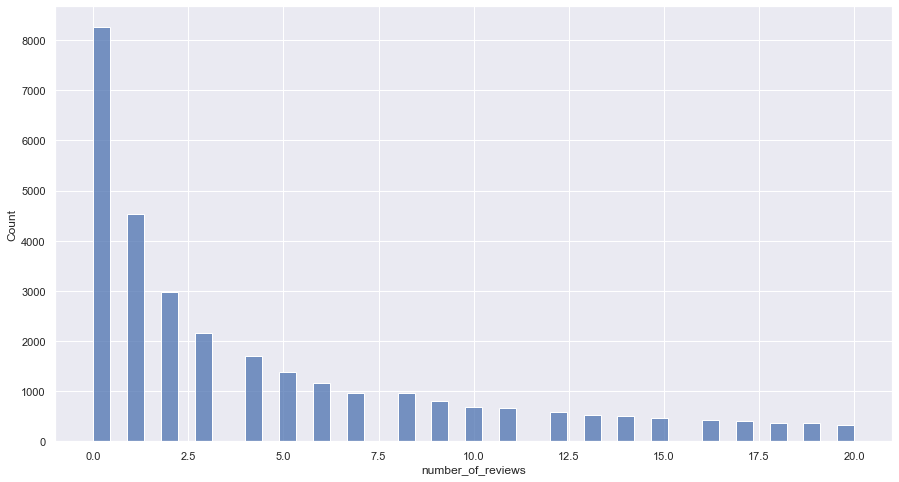

In [5]:
plt.figure(figsize = (15,8))
sns.histplot(data=df, x="number_of_reviews")

La mayoria de lugares para hospedarse tiene 0 reseñas y muy pocas del dataseet llegan a tener mas de 6 reseñas. 

<AxesSubplot:xlabel='bedrooms', ylabel='Count'>

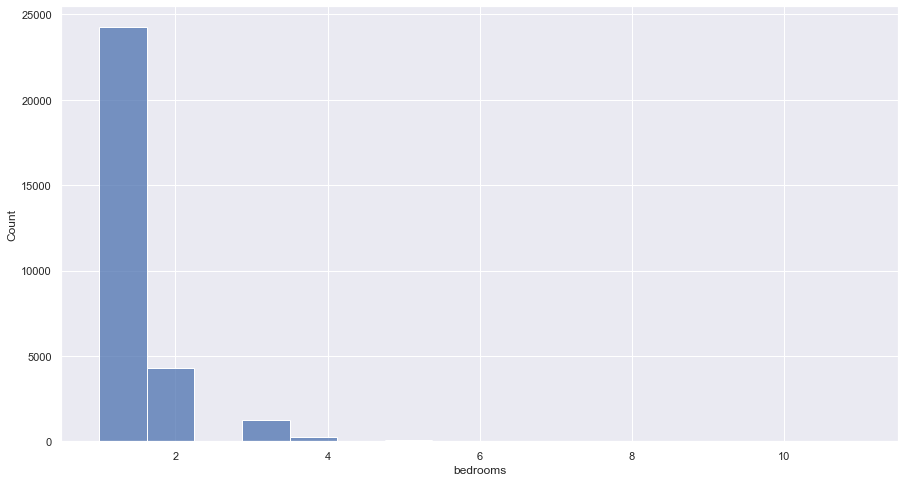

In [6]:
plt.figure(figsize = (15,8))
sns.histplot(data=df, x="bedrooms")

R/ La mayoria de lugares tienen una habitacion. Y menos de 4500 lugares tienen 2 habitaciones y ya menos de 1300 lugares tienen entre 3 o mas habitaciones

In [7]:
df_bedrooms=df.groupby("bedrooms").size()
df_bedrooms

bedrooms
1     24254
2      4321
3      1241
4       279
5        62
6        14
7         4
8         3
11        1
dtype: int64

<AxesSubplot:xlabel='bathrooms', ylabel='Count'>

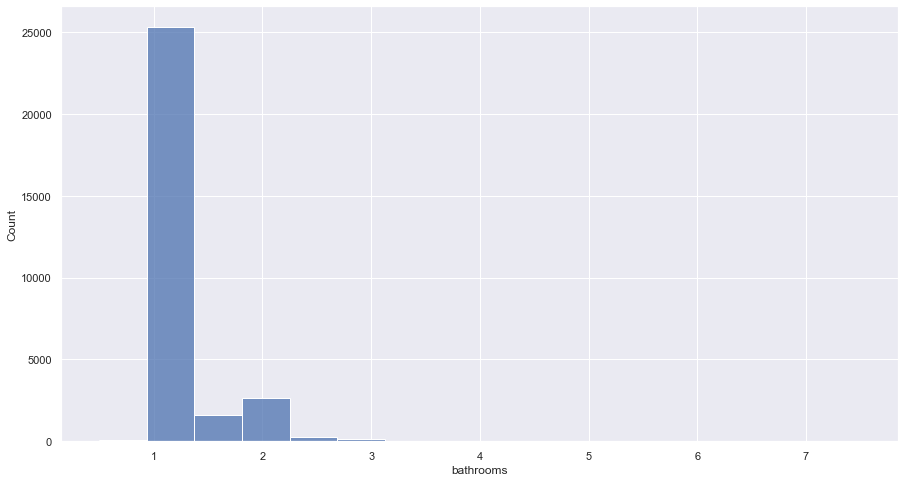

In [8]:
plt.figure(figsize = (15,8))
sns.histplot(data=df, x="bathrooms")


In [9]:
df_bathrooms=df.groupby("bathrooms").size()
df_bathrooms

bathrooms
0.5       64
1.0    25298
1.5     1628
2.0     2650
2.5      272
3.0      149
3.5       35
4.0       34
4.5        3
5.0        3
5.5        1
6.0       25
6.5       14
7.0        2
7.5        1
dtype: int64

R/ La mayoria de los lugares tienen entre 1 y dos baños, y alrededor de 500 lugares disponen de mas de 2 baños.

<AxesSubplot:xlabel='price', ylabel='Count'>

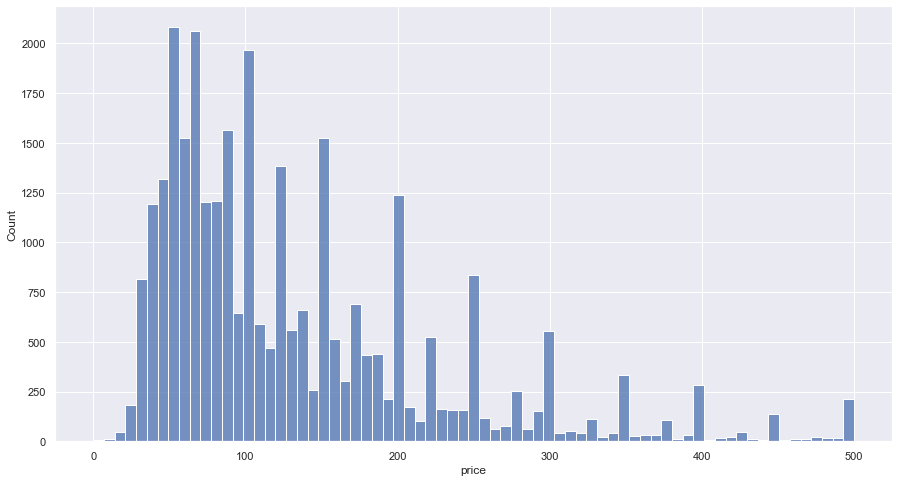

In [10]:
plt.figure(figsize = (15,8))
sns.histplot(data=df, x="price")

R/ La mayoria de los lugares tienen un precio entre 30 y 100 dolares. Y aproximadamente 1000 lugares cobran menos de 30 dolares y ya el resto, cobran mas de 100 dolares.

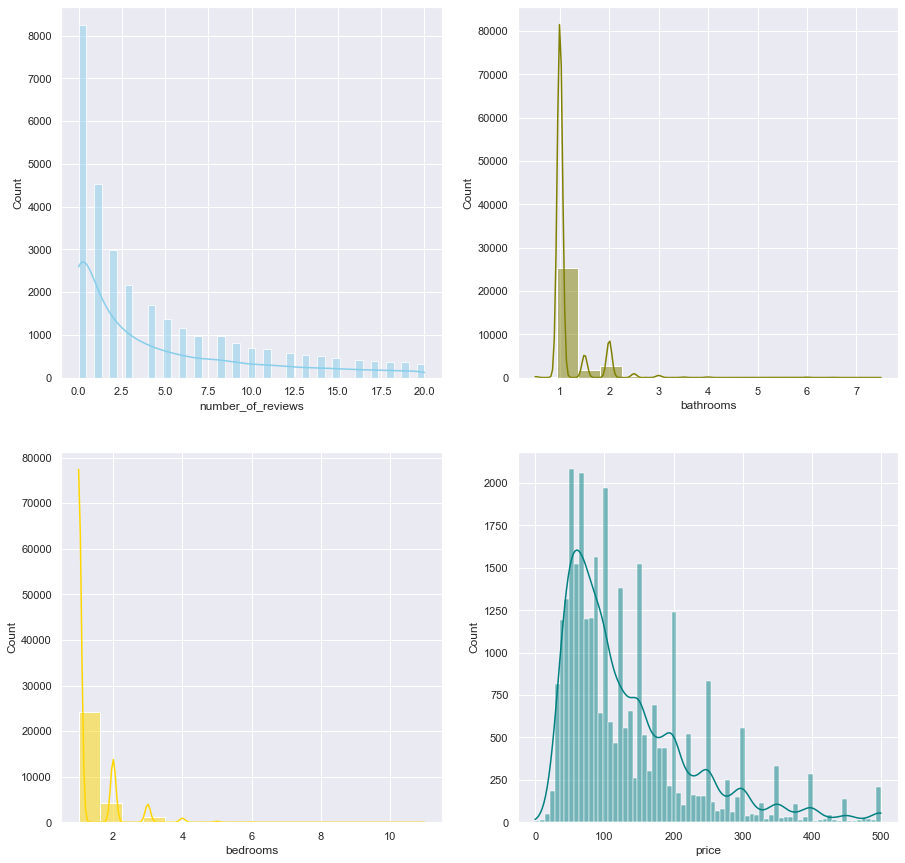

In [11]:
fig, axs = plt.subplots(2, 2, figsize=(15, 15))

sns.histplot(data=df, x="number_of_reviews", kde=True, color="skyblue", ax=axs[0, 0])
sns.histplot(data=df, x="bathrooms", kde=True, color="olive", ax=axs[0, 1])
sns.histplot(data=df, x="bedrooms", kde=True, color="gold", ax=axs[1, 0])
sns.histplot(data=df, x="price", kde=True, color="teal", ax=axs[1, 1])

plt.show()

4. Cree diagramas de cajas y bigotes para:  price vs. bathrooms, price vs. number_of_reviews, and price vs. review_scores_cleanliness, price vs bedrooms. Qué puede observar en cada uno de ellos?

<AxesSubplot:xlabel='bathrooms', ylabel='price'>

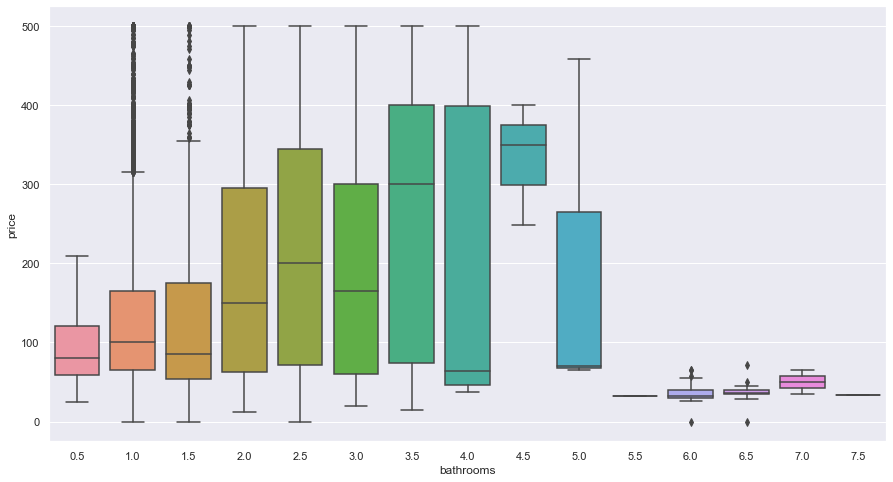

In [12]:
plt.figure(figsize = (15,8))
sns.boxplot(x="bathrooms", y="price", data=df)

R/ Los lugares con un baño llegan a tener una mediana de precios entre 80 dolares y 100 dolares.Tambien podemos decir que hay lugares por encima de los 300 dolares que tienen solo un baño. Los lugares entre 2  y 3 baños llegan a tener una mediana de precios entre 170 y 200 dolares. Los lugares entre 3.5 y 5 baños tienen mucha dispersion en cuanto al precio  a excepcion de los que tienen 4.5 baños. Los lugares entre 5.5 baños en adelante la dispersion de los precios es muy bajita, hay unos con precios muy economicos y otros con precios muy elevados con respecto a la distribucion de los precios de los lugares.(hostales)

<AxesSubplot:xlabel='number_of_reviews', ylabel='price'>

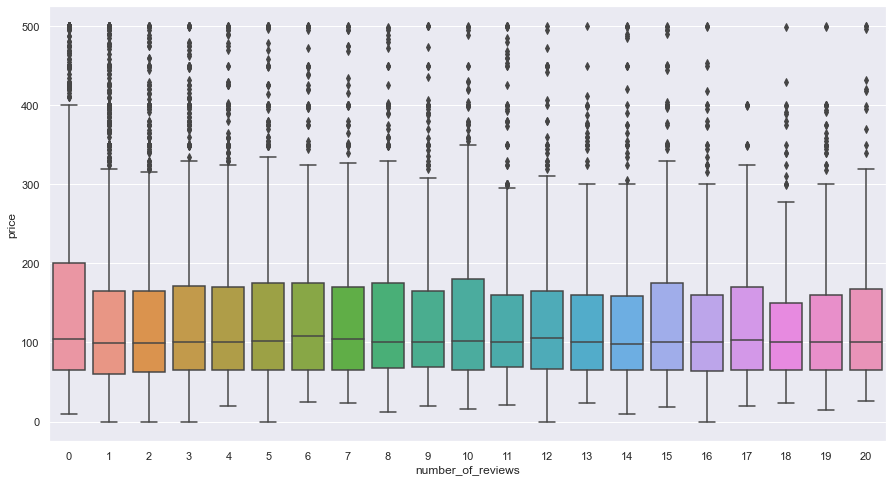

In [13]:
plt.figure(figsize = (15,8))
sns.boxplot(x="number_of_reviews", y="price", data=df)

R/ La distribucion de los precios por cada numero de reseña tiende a tener un comportamiento muy similar. Sin importar la calificacion de los lugares tiene un precio similar.

<AxesSubplot:xlabel='review_scores_cleanliness', ylabel='price'>

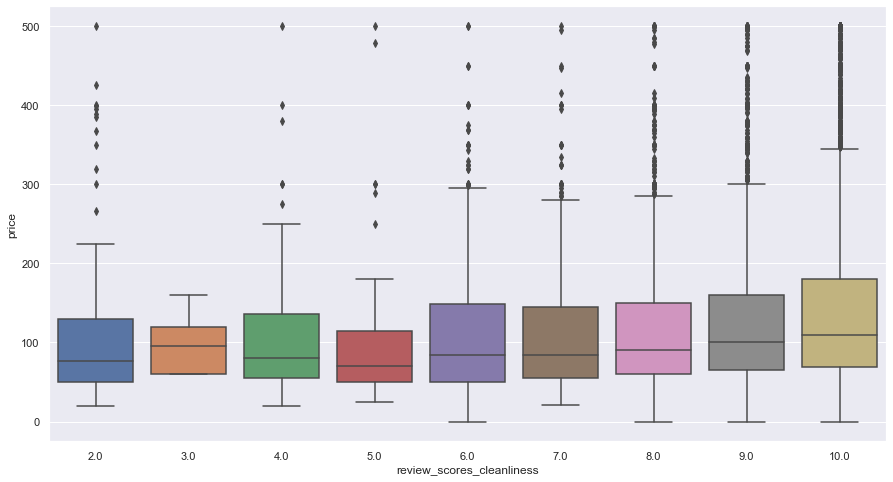

In [14]:
plt.figure(figsize = (15,8))
sns.boxplot(x="review_scores_cleanliness", y="price", data=df)

R/  Podemos decir que con respecto a los puntjaes de limpieza la mediana de los precios se comporta similar, y tambien, entre mas mas puntajes de limpieza tiende a ser mas costoso el lugar

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

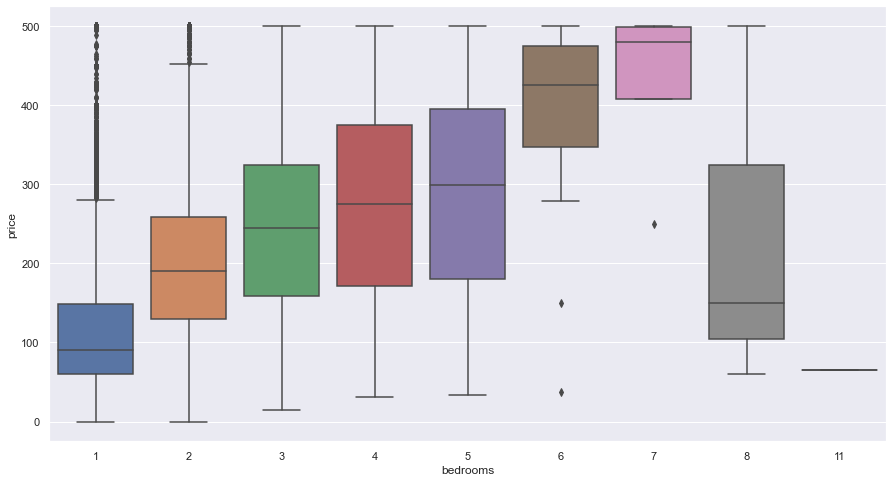

In [15]:
plt.figure(figsize = (15,8))
sns.boxplot(x="bedrooms", y="price", data=df)


R/ Podemos decir que entre mas baños, el precio es mayor. Los lugares con mas de 8 baños tienden a tener un bajo precio con respecto a los otros, lo mas seguro es que sean hostales.

5. Escriba un código para imprimir las columnas que están correlacionadas positivamente con el precio, de la más positiva a la menos positiva. Del mismo modo, imprima las columnas que están correlacionadas negativamente, de la más negativa a la menos negativa. (Pista: use el metodo corr()). A partir de las tablas anteriores, ¿qué factores están más correlacionados con el precio (positivo o negativo)? ¿Qué correlaciones son sorprendentes, y qué hipótesis podría explicarlas?

In [16]:
c = df.corr()
c

,id,host_id,host_since,host_response_rate,host_is_superhost,host_listings_count,host_identity_verified,latitude,longitude,accommodates,...,hot_tub_sauna_or_pool,internet,long_term_stays,pets_allowed,private_entrance,secure,self_check_in,smoking_allowed,accessible,event_suitable
id,1.000000,0.567767,0.530654,0.103325,0.062122,0.071475,-0.351613,-0.005784,0.109353,0.095344,...,-0.019574,0.004068,0.133459,-0.055286,0.264720,-0.062950,0.143029,0.002802,-0.074635,0.026211
host_id,0.567767,1.000000,0.905404,0.031051,0.002383,0.036721,-0.471233,0.025581,0.128454,0.103469,...,-0.001314,-0.020248,0.121658,-0.046604,0.164151,-0.051488,0.039264,0.000612,-0.033810,0.014483
host_since,0.530654,0.905404,1.000000,0.029362,-0.005315,0.056799,-0.460919,0.043202,0.133671,0.059946,...,0.008638,-0.024976,0.102444,-0.037173,0.134174,-0.033657,0.027736,0.017108,-0.038432,0.020046
host_response_rate,0.103325,0.031051,0.029362,1.000000,0.133280,0.071515,-0.021462,-0.000586,0.018393,0.067337,...,0.011373,0.074723,0.089964,-0.007350,0.056537,-0.009455,0.112369,-0.043715,0.019444,-0.020509
host_is_superhost,0.062122,0.002383,-0.005315,0.133280,1.000000,-0.021501,-0.000838,-0.017228,0.064378,0.026010,...,-0.018348,0.030957,0.136806,-0.021250,0.080201,0.048612,0.123705,-0.025842,0.042958,-0.011303
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
secure,-0.062950,-0.051488,-0.033657,-0.009455,0.048612,-0.024161,0.030771,-0.008190,0.009031,0.028119,...,0.010198,0.017604,0.019094,0.006945,0.025824,1.000000,0.055381,0.003261,0.048724,0.023681
self_check_in,0.143029,0.039264,0.027736,0.112369,0.123705,0.163752,-0.024953,-0.063903,0.024616,0.145485,...,0.011348,0.044626,0.198486,0.046163,0.160687,0.055381,1.000000,-0.024765,0.051577,0.003632
smoking_allowed,0.002802,0.000612,0.017108,-0.043715,-0.025842,0.000765,-0.010547,-0.012216,0.046009,-0.049053,...,0.010449,-0.038682,-0.021062,0.141324,-0.013995,0.003261,-0.024765,1.000000,0.019262,0.201513
accessible,-0.074635,-0.033810,-0.038432,0.019444,0.042958,-0.029330,0.041090,0.028615,0.031948,0.048473,...,0.048509,0.019621,0.120317,0.037936,0.028427,0.048724,0.051577,0.019262,1.000000,0.033365


In [17]:
df2 = pd.DataFrame(c['price'])
df2

,price
id,0.027533
host_id,0.028931
host_since,-0.009671
host_response_rate,0.034280
host_is_superhost,-0.016325
...,...
secure,0.019678
self_check_in,0.108914
smoking_allowed,-0.054131
accessible,0.038301


In [18]:
positivos = df2[(df2['price'] >0)].sort_values('price',ascending=False)
positivos

,price
price,1.000000
accommodates,0.571541
bedrooms,0.454539
beds,0.421355
guests_included,0.321970
tv,0.271563
elevator,0.229610
calculated_host_listings_count_entire_homes,0.218890
white_goods,0.214283
gym,0.209892


In [19]:
negativos = df2[(df2['price'] <0)].sort_values('price',ascending=True)
negativos

,price
longitude,-0.294196
calculated_host_listings_count_private_rooms,-0.127504
calculated_host_listings_count_shared_rooms,-0.101389
smoking_allowed,-0.054131
host_greeting,-0.051356
number_of_reviews,-0.029229
host_identity_verified,-0.022861
parking,-0.019383
host_is_superhost,-0.016325
number_of_reviews_ltm,-0.011481


R/  ¿qué factores están más correlacionados con el precio (positivo o negativo)? 
    
       Positivamente el precio tiene mayor correlacion con la capacidad del lugar, las habitaciones y las camas.  Negativamente el precio tiene correlaciones muy poco significatives pero las destacados fueron la coordenada en longitud, el numero de habitaciones privados  y el numero de habitaciones publicos
    

¿Qué correlaciones son sorprendentes

    

, y qué hipótesis podría explicarlas?

    

### Mas herramientas para visualización. Mapas!

Creemos un mapa interactivo para visualizar nuestros datos ya que tenemos lat y long. Como nuestros datos son de NY podemos situarnos allí

In [20]:
ny_coords = [40.738, -73.98] # lat, long
folium_map = folium.Map(location=ny_coords,zoom_start=13)
folium_map

Con la función zip podemos concatener las coordenadas junto con el precio de la vivienda para luego crear una lista. Nota: reemplazar data con el nombre de su dataframe

In [22]:
my_zip = zip(df['latitude'], df['longitude'], df['price'])
list_of_my_zip = list(my_zip)
list_of_my_zip[0:15]

[(40.64749, -73.97237, 149),
 (40.80902, -73.9419, 150),
 (40.79685, -73.94872, 190),
 (40.65599, -73.97519, 60),
 (40.86754, -73.92639, 80),
 (40.63702, -73.96327, 150),
 (40.66278, -73.97966, 120),
 (40.65944, -73.96238, 150),
 (40.68554, -73.9409, 115),
 (40.73961, -73.98074, 200),
 (40.72004, -73.99104, 110),
 (40.6734299999999, -73.98338, 225),
 (40.65401, -73.96323, 130),
 (40.72912, -73.98057, 50),
 (40.68634, -73.966, 98)]

Finalmente crearemos un mapa de calor HeatMap, que nos ayudará a visualizar donde están las más costosas

In [23]:
hm_layer = HeatMap(list_of_my_zip,
                   min_opacity=0.2,
                   radius=8,
                   blur=6, 
                 )

Finalmente lo añadimos...

In [25]:
folium_map.add_child(hm_layer)
folium_map

6. Nombre los lugares de NY dondee son más caros y menos caros

R/Caros: financial distrit y los sectores cercas a central park
menos caros: El resto

7. Realizar los mismo que lo anterior pero ahora con review_score_rating en lugar de price. Nota: debes eliminar los NA's, asegurate de crear una copia de tu dataset original con el comando: data.copy() para evitar modificar el original 

In [57]:
data = df.copy()
data = data[data["review_scores_rating"].notna()]

In [58]:
my_zip2 = zip(data['latitude'], data['longitude'], data['review_scores_rating'])
list_of_my_zip2 = list(my_zip2)
list_of_my_zip2[0:15]

[(40.64749, -73.97237, 98.0),
 (40.65599, -73.97519, 97.0),
 (40.66278, -73.97966, 97.0),
 (40.65944, -73.96238, 96.0),
 (40.68554, -73.9409, 94.0),
 (40.73961, -73.98074, 95.0),
 (40.72004, -73.99104, 98.0),
 (40.6734299999999, -73.98338, 100.0),
 (40.65401, -73.96323, 93.0),
 (40.72912, -73.98057, 60.0),
 (40.68634, -73.966, 87.0),
 (40.82803, -73.94731, 100.0),
 (40.82279, -73.95139, 84.0),
 (40.68157, -73.98989, 98.0),
 (40.68698, -73.9657199999999, 94.0)]

In [56]:
hm_layer = HeatMap(list_of_my_zip,
                   min_opacity=0.2,
                   radius=8,
                   blur=6, 
                 )